# Team 4 - TED Talks

![](https://psmarketingimages.s3.amazonaws.com/blog/wp-content/uploads/2017/04/23103819/TED-Talks-for-Small-Business-and-Entrepreneurs.jpg)

_For more information about the dataset, read [here](https://www.kaggle.com/rounakbanik/ted-talks)._

## Your tasks
- Name your team!
- Read the source and do some quick research to understand more about the dataset and its topic
- Clean the data
- Perform Exploratory Data Analysis on the dataset
- Analyze the data more deeply and extract insights
- Visualize your analysis on Google Data Studio
- Present your works in front of the class and guests next Monday

## Submission Guide
- Create a Github repository for your project
- Upload the dataset (.csv file) and the Jupyter Notebook to your Github repository. In the Jupyter Notebook, **include the link to your Google Data Studio report**.
- Submit your works through this [Google Form](https://forms.gle/oxtXpGfS8JapVj3V8).

## Tips for Data Cleaning, Manipulation & Visualization
- Here are some of our tips for Data Cleaning, Manipulation & Visualization. [Click here](https://hackmd.io/cBNV7E6TT2WMliQC-GTw1A)

_____________________________

## Some Hints for This Dataset:
- The `ratings` column is in dictionary format. How should we handle them?
- Same for `related_talks` and `tags` column
- Can you find the `year` of the talks?
- And more...

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
# Start your codes here!
df = pd.read_csv('ted.csv')

In [3]:
df.head()

,comments,description,duration,event,film_date,languages,main_speaker,name,num_speaker,published_date,ratings,related_talks,speaker_occupation,tags,title,url,views
0,4553,Sir Ken Robinson makes an entertaining and pro...,1164,TED2006,1140825600,60,Ken Robinson,Ken Robinson: Do schools kill creativity?,1,1151367060,"[{'id': 7, 'name': 'Funny', 'count': 19645}, {...","[{'id': 865, 'hero': 'https://pe.tedcdn.com/im...",Author/educator,"['children', 'creativity', 'culture', 'dance',...",Do schools kill creativity?,https://www.ted.com/talks/ken_robinson_says_sc...,47227110
1,265,With the same humor and humanity he exuded in ...,977,TED2006,1140825600,43,Al Gore,Al Gore: Averting the climate crisis,1,1151367060,"[{'id': 7, 'name': 'Funny', 'count': 544}, {'i...","[{'id': 243, 'hero': 'https://pe.tedcdn.com/im...",Climate advocate,"['alternative energy', 'cars', 'climate change...",Averting the climate crisis,https://www.ted.com/talks/al_gore_on_averting_...,3200520
2,124,New York Times columnist David Pogue takes aim...,1286,TED2006,1140739200,26,David Pogue,David Pogue: Simplicity sells,1,1151367060,"[{'id': 7, 'name': 'Funny', 'count': 964}, {'i...","[{'id': 1725, 'hero': 'https://pe.tedcdn.com/i...",Technology columnist,"['computers', 'entertainment', 'interface desi...",Simplicity sells,https://www.ted.com/talks/david_pogue_says_sim...,1636292
3,200,"In an emotionally charged talk, MacArthur-winn...",1116,TED2006,1140912000,35,Majora Carter,Majora Carter: Greening the ghetto,1,1151367060,"[{'id': 3, 'name': 'Courageous', 'count': 760}...","[{'id': 1041, 'hero': 'https://pe.tedcdn.com/i...",Activist for environmental justice,"['MacArthur grant', 'activism', 'business', 'c...",Greening the ghetto,https://www.ted.com/talks/majora_carter_s_tale...,1697550
4,593,You've never seen data presented like this. Wi...,1190,TED2006,1140566400,48,Hans Rosling,Hans Rosling: The best stats you've ever seen,1,1151440680,"[{'id': 9, 'name': 'Ingenious', 'count': 3202}...","[{'id': 2056, 'hero': 'https://pe.tedcdn.com/i...",Global health expert; data visionary,"['Africa', 'Asia', 'Google', 'demo', 'economic...",The best stats you've ever seen,https://www.ted.com/talks/hans_rosling_shows_t...,12005869


In [4]:
import datetime

In [5]:
df['film_date'] = df['film_date'].apply(lambda x: datetime.datetime.fromtimestamp( int(x) ).strftime('%d-%m-%Y') )
df['published_date'] = df['published_date'].apply(lambda x: datetime.datetime.fromtimestamp( int(x) ).strftime('%d-%m-%Y') )

In [6]:
df.head(5)

,comments,description,duration,event,film_date,languages,main_speaker,name,num_speaker,published_date,ratings,related_talks,speaker_occupation,tags,title,url,views
0,4553,Sir Ken Robinson makes an entertaining and pro...,1164,TED2006,25-02-2006,60,Ken Robinson,Ken Robinson: Do schools kill creativity?,1,27-06-2006,"[{'id': 7, 'name': 'Funny', 'count': 19645}, {...","[{'id': 865, 'hero': 'https://pe.tedcdn.com/im...",Author/educator,"['children', 'creativity', 'culture', 'dance',...",Do schools kill creativity?,https://www.ted.com/talks/ken_robinson_says_sc...,47227110
1,265,With the same humor and humanity he exuded in ...,977,TED2006,25-02-2006,43,Al Gore,Al Gore: Averting the climate crisis,1,27-06-2006,"[{'id': 7, 'name': 'Funny', 'count': 544}, {'i...","[{'id': 243, 'hero': 'https://pe.tedcdn.com/im...",Climate advocate,"['alternative energy', 'cars', 'climate change...",Averting the climate crisis,https://www.ted.com/talks/al_gore_on_averting_...,3200520
2,124,New York Times columnist David Pogue takes aim...,1286,TED2006,24-02-2006,26,David Pogue,David Pogue: Simplicity sells,1,27-06-2006,"[{'id': 7, 'name': 'Funny', 'count': 964}, {'i...","[{'id': 1725, 'hero': 'https://pe.tedcdn.com/i...",Technology columnist,"['computers', 'entertainment', 'interface desi...",Simplicity sells,https://www.ted.com/talks/david_pogue_says_sim...,1636292
3,200,"In an emotionally charged talk, MacArthur-winn...",1116,TED2006,26-02-2006,35,Majora Carter,Majora Carter: Greening the ghetto,1,27-06-2006,"[{'id': 3, 'name': 'Courageous', 'count': 760}...","[{'id': 1041, 'hero': 'https://pe.tedcdn.com/i...",Activist for environmental justice,"['MacArthur grant', 'activism', 'business', 'c...",Greening the ghetto,https://www.ted.com/talks/majora_carter_s_tale...,1697550
4,593,You've never seen data presented like this. Wi...,1190,TED2006,22-02-2006,48,Hans Rosling,Hans Rosling: The best stats you've ever seen,1,27-06-2006,"[{'id': 9, 'name': 'Ingenious', 'count': 3202}...","[{'id': 2056, 'hero': 'https://pe.tedcdn.com/i...",Global health expert; data visionary,"['Africa', 'Asia', 'Google', 'demo', 'economic...",The best stats you've ever seen,https://www.ted.com/talks/hans_rosling_shows_t...,12005869


# Most View

In [7]:
Most_view = df[['title','main_speaker','views']].sort_values('views', ascending=False)[:15]

In [8]:
Most_view

,title,main_speaker,views
0,Do schools kill creativity?,Ken Robinson,47227110
1346,Your body language may shape who you are,Amy Cuddy,43155405
677,How great leaders inspire action,Simon Sinek,34309432
837,The power of vulnerability,Brené Brown,31168150
452,10 things you didn't know about orgasm,Mary Roach,22270883
1776,How to speak so that people want to listen,Julian Treasure,21594632
201,My stroke of insight,Jill Bolte Taylor,21190883
5,Why we do what we do,Tony Robbins,20685401
2114,This is what happens when you reply to spam email,James Veitch,20475972
1416,"Looks aren't everything. Believe me, I'm a model.",Cameron Russell,19787465


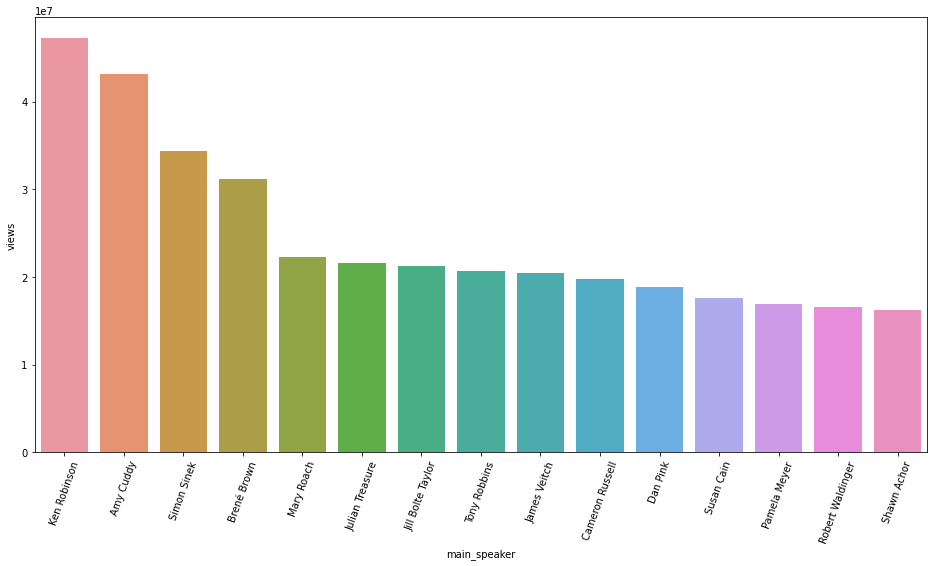

In [9]:
# visualize

plt.figure(figsize=(16,8))
sns.barplot(x='main_speaker', y='views', data=Most_view)
plt.xticks(rotation=70)
plt.show()

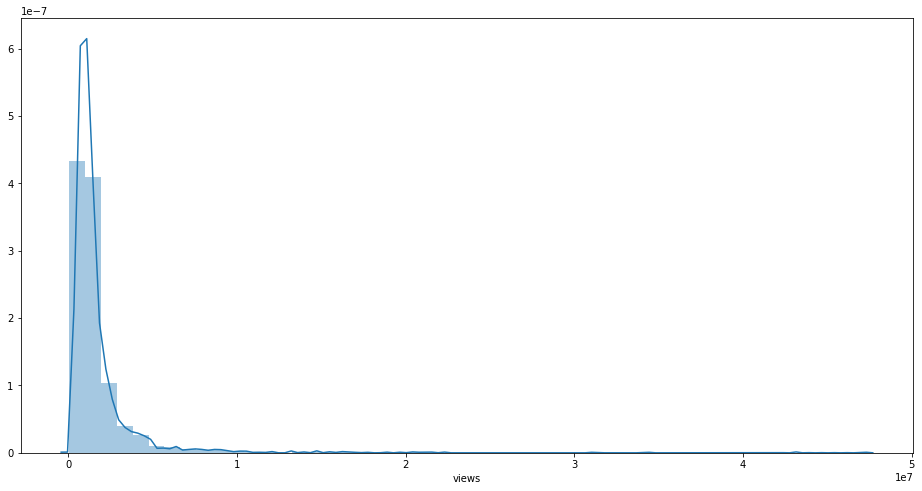

In [10]:
plt.figure(figsize=(16,8))
sns.distplot(df['views'])

In [11]:
df['views'].describe()

count    2.550000e+03
mean     1.698297e+06
std      2.498479e+06
min      5.044300e+04
25%      7.557928e+05
50%      1.124524e+06
75%      1.700760e+06
max      4.722711e+07
Name: views, dtype: float64

# Most Comment

In [12]:
Most_comment = df[['title','main_speaker','comments']].sort_values('comments', ascending=False)[:15]

In [13]:
Most_comment

,title,main_speaker,comments
96,Militant atheism,Richard Dawkins,6404
0,Do schools kill creativity?,Ken Robinson,4553
644,Science can answer moral questions,Sam Harris,3356
201,My stroke of insight,Jill Bolte Taylor,2877
1787,How do you explain consciousness?,David Chalmers,2673
954,Taking imagination seriously,Janet Echelman,2492
840,On reading the Koran,Lesley Hazleton,2374
1346,Your body language may shape who you are,Amy Cuddy,2290
661,The danger of science denial,Michael Specter,2272
677,How great leaders inspire action,Simon Sinek,1930


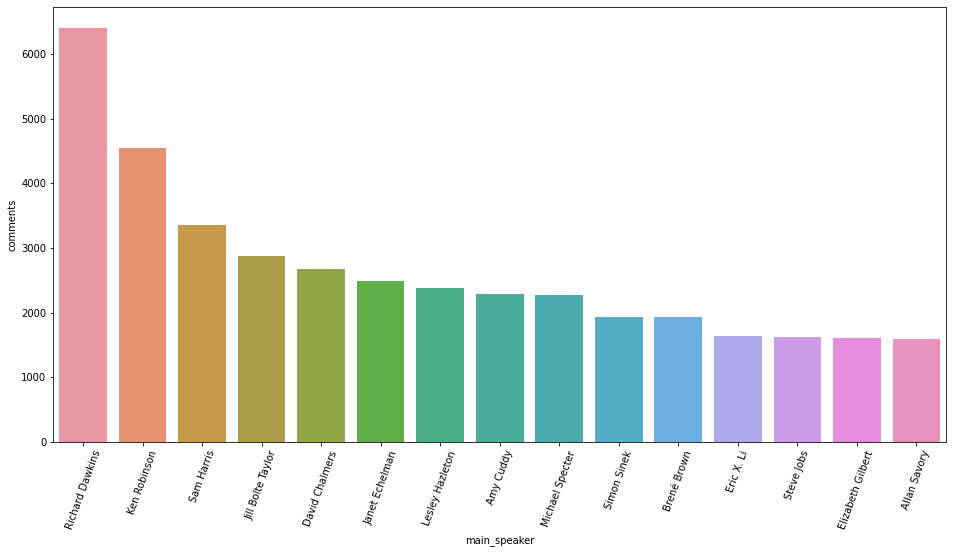

In [14]:
# visualize

plt.figure(figsize=(16,8))
sns.barplot(x='main_speaker', y='comments', data=Most_comment)
plt.xticks(rotation=70)
plt.show()

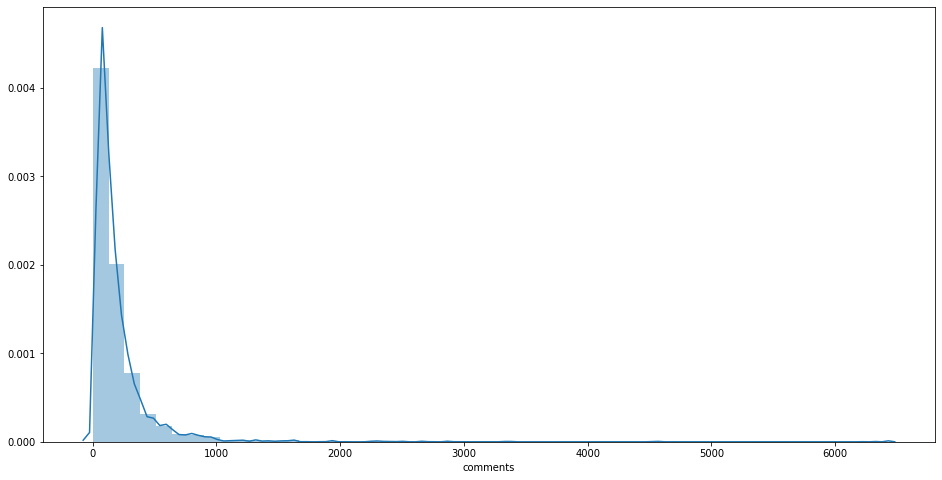

In [15]:
plt.figure(figsize=(16,8))
sns.distplot(df['comments'])

In [16]:
df['comments'].describe()

count    2550.000000
mean      191.562353
std       282.315223
min         2.000000
25%        63.000000
50%       118.000000
75%       221.750000
max      6404.000000
Name: comments, dtype: float64

# View and comment

<Figure size 1152x576 with 0 Axes>

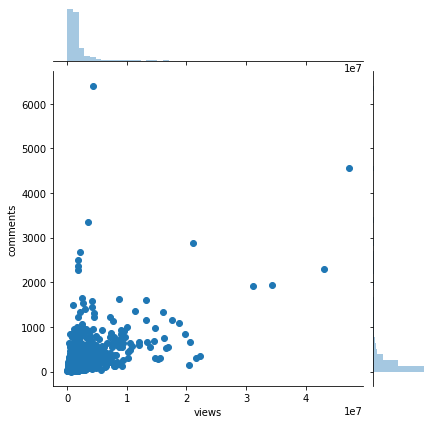

In [17]:
plt.figure(figsize=(16,8))
sns.jointplot(x='views',y='comments', data=df)
plt.show()

In [18]:
df[['views','comments']].corr()

,views,comments
views,1.000000,0.530939
comments,0.530939,1.000000


Ta thấy được độ hấp dẫn giữa 2 feature view và comment là rất lớn\
Vì thế ta sẽ chia tỷ lệ để xem xét

In [19]:
df['com/vie'] = df['comments']/df['views']

In [20]:
df[['title', 'main_speaker','views', 'comments', 'com/vie', 'film_date']].sort_values('com/vie', ascending=False).head(10)

,title,main_speaker,views,comments,com/vie,film_date
744,The case for same-sex marriage,Diane J. Savino,292395,649,0.002220,02-12-2009
803,E-voting without fraud,David Bismark,543551,834,0.001534,14-07-2010
96,Militant atheism,Richard Dawkins,4374792,6404,0.001464,02-02-2002
694,Inside a school for suicide bombers,Sharmeen Obaid-Chinoy,1057238,1502,0.001421,10-02-2010
954,Taking imagination seriously,Janet Echelman,1832930,2492,0.001360,03-03-2011
840,On reading the Koran,Lesley Hazleton,1847256,2374,0.001285,10-10-2010
876,Curating humanity's heritage,Elizabeth Lindsey,439180,555,0.001264,08-12-2010
1787,How do you explain consciousness?,David Chalmers,2162764,2673,0.001236,18-03-2014
661,The danger of science denial,Michael Specter,1838628,2272,0.001236,11-02-2010
561,Dance to change the world,Mallika Sarabhai,481834,595,0.001235,04-11-2009


Tìm được những buổi talk được bàn luận nhiều nhất

```
# This is formatted as code
```



# Speaker

In [24]:
speaker = df.groupby('main_speaker').count().reset_index()[['main_speaker', 'comments']]

In [29]:
 speaker = speaker.sort_values('comments',ascending=False)[:10]
 speaker

,main_speaker,comments
770,Hans Rosling,9
1066,Juan Enriquez,7
1693,Rives,6
1278,Marco Tempest,6
1075,Julian Treasure,5
397,Clay Shirky,5
1487,Nicholas Negroponte,5
850,Jacqueline Novogratz,5
248,Bill Gates,5
424,Dan Ariely,5


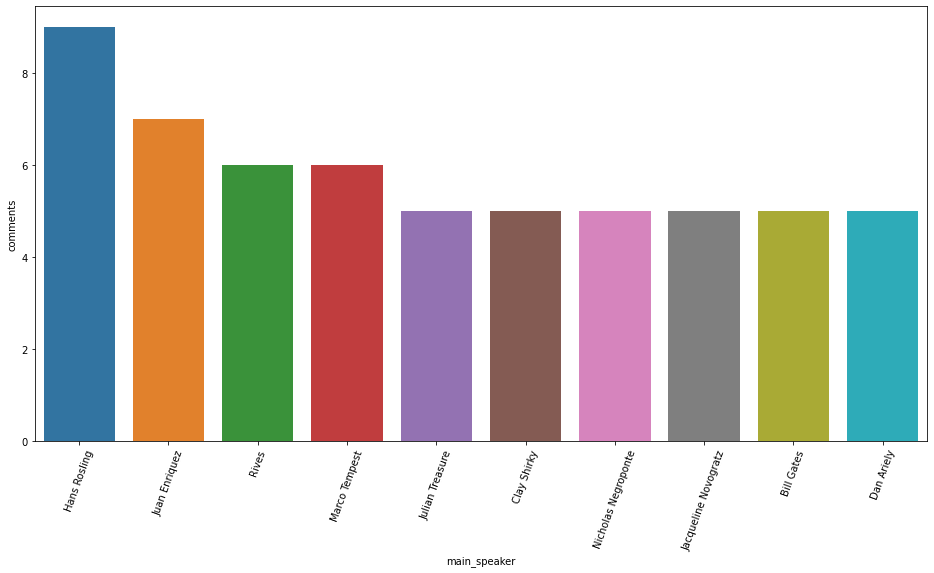

In [30]:
plt.figure(figsize=(16,8))
sns.barplot(x='main_speaker', y='comments', data=speaker)
plt.xticks(rotation=70)
plt.show()

In [34]:
occupation = df.groupby('speaker_occupation').count().reset_index()[['speaker_occupation', 'comments']]

In [35]:
 occupation = occupation.sort_values('comments',ascending=False)[:10]
 occupation

,speaker_occupation,comments
1426,Writer,45
83,Artist,34
413,Designer,34
753,Journalist,33
515,Entrepreneur,31
71,Architect,30
733,Inventor,27
1131,Psychologist,26
1011,Photographer,25
567,Filmmaker,21


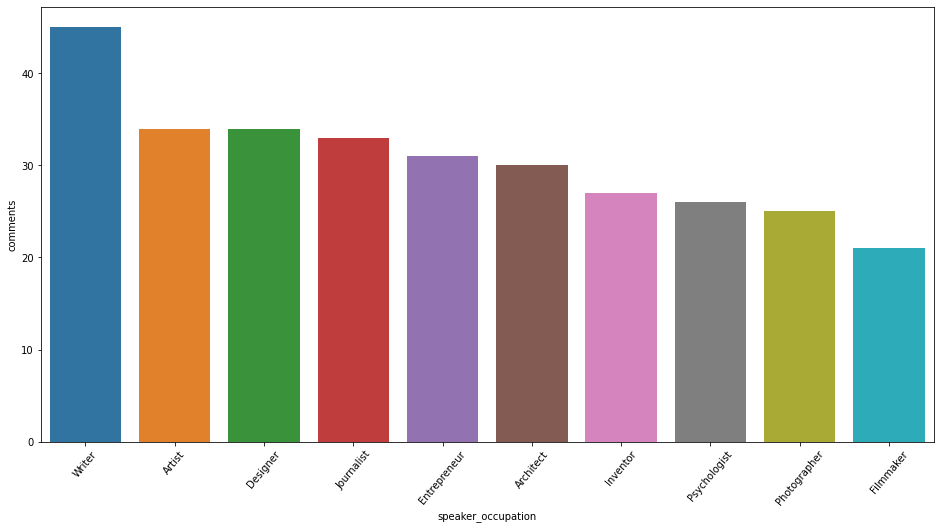

In [37]:
plt.figure(figsize=(16,8))
sns.barplot(x='speaker_occupation', y='comments', data=occupation)
plt.xticks(rotation=50)
plt.show()

Các buổi talk của nhà văn được thảo luận nhiều

# Year

In [39]:
df['year'] = df['film_date'].apply(lambda x: x.split('-')[2])
Year = pd.DataFrame(df['year'].value_counts().reset_index())

In [41]:
Year.columns = ['year', 'talks']
Year

,year,talks
0,2011,270
1,2013,270
2,2010,267
3,2012,267
4,2016,246
5,2015,239
6,2014,237
7,2009,232
8,2007,114
9,2017,98


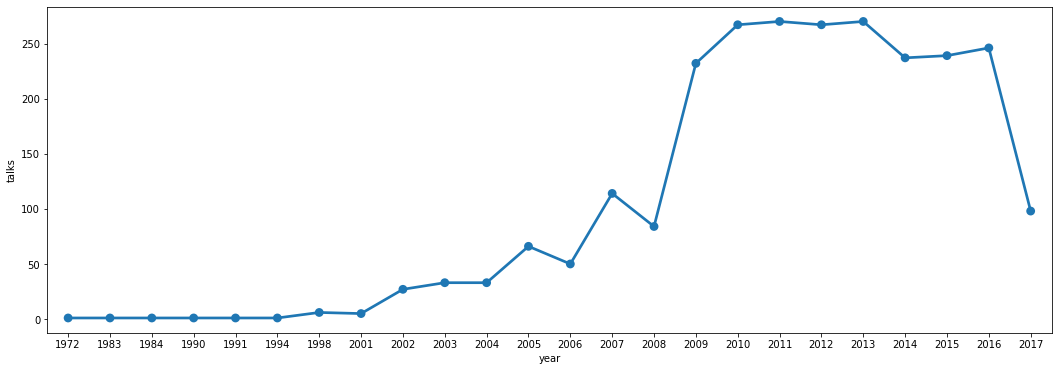

In [42]:
plt.figure(figsize=(18,6))
sns.pointplot(x='year', y='talks', data=Year)
plt.show()